<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [642]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
from scipy.stats import shapiro, probplot
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, levene
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [645]:
#Importation du fichier customers.csv
Customers = pd.read_csv('C:/Users/mariam.sissoko01/Desktop/DATA ANALYST/Data/customers.csv', sep=';')

#Importation du fichier products.csv
Product = pd.read_csv('C:/Users/mariam.sissoko01/Desktop/DATA ANALYST/Data/products.csv', sep=';')

#Importation du fichier Transactions.csv
Transact = pd.read_csv('C:/Users/mariam.sissoko01/Desktop/DATA ANALYST/Data/Transactions.csv', sep=';')

C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\1761405218.py:8: DtypeWarning:

Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [646]:
Customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [647]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [648]:
Product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [650]:
Transact.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [655]:
def verification_cle_primaire(df,col):
    if df[col].nunique()==df.shape[0]:
        return f'{col} est la cle primaire du data frame'
    else :
        return f'{col} n\'est la cle primaire du data frame'

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Données customers</h3>
</div>

In [658]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [660]:
# Vérification de la clé primaire
verification_cle_primaire (Customers,'client_id')

'client_id est la cle primaire du data frame'

In [662]:
Customers.describe(include="all")

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_4410,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [664]:
Customers['age'] = 2024 - Customers['birth']

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - Nettoyage des données Customers</h3>
</div>

In [667]:
Customers.isna().sum()

client_id    0
sex          0
birth        0
age          0
dtype: int64

In [669]:
Customers.duplicated().sum()

0

In [671]:
#Vérification des valeurs manquantes au niveau de la clé primaire client_id
nb_valeurs_manquantes = Customers["client_id"].isna().sum()

In [673]:
#Vérification des valeurs negatives au niveau de la clé primaire client_id
valeurs_negatives = [
    client for client in Customers
    if isinstance(client, dict) and "client_id" in client and isinstance(client["client_id"], (int, float)) and client["client_id"] < 0
]
print(valeurs_negatives)

[]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5 - Données product</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5.1 - Lecure du fichier product</h3>
</div>

In [677]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [679]:
# Vérification de la clé primaire
verification_cle_primaire (Product,'id_prod')

'id_prod est la cle primaire du data frame'

In [681]:
Product.describe(include="all")

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5.2 - Nettoyage des données Product</h3>
</div>

In [684]:
#Verification des valeurs manquantes au niveau du fichier Product
Customers.isna().sum()

client_id    0
sex          0
birth        0
age          0
dtype: int64

In [686]:
#Verification des doublons au niveau du fichier Product
Product.duplicated().sum()

0

In [688]:
#Vérification des valeurs negatives au niveau de la clé primaire id_prod
valeurs_negativesprod = [
    Prod for Prod in Product
    if isinstance(Prod, dict) and "id_prod" in prod and isinstance(Prod["id_prod"], (int, float)) and Prod["id_prod"] < 0
]
print(valeurs_negativesprod)

[]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.6 - Données transact</h3>
</div>

In [691]:
Transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.6.1 - Nettoyage des données Transact
</div>

In [694]:
#Verification des valeurs manquantes 
Transact.isna().sum()

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

In [696]:
Transact.dropna(inplace=True)

In [698]:
#Vérification des doublons
Transact.duplicated().sum()

0

In [699]:
# Vérification de la clé primaire
verification_cle_primaire (Transact,'id_prod')

"id_prod n'est la cle primaire du data frame"

In [702]:
Transact.describe(include='all')

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


In [703]:
#Vérification des valeurs negatives au niveau de la clé primaire id_prod
valeurs_negativestrans = [
    Trans for Trans in Transact
    if isinstance(Trans, dict) and "id_prod" in Trans and isinstance(Trans["id_prod"], (int, float)) and Trans["id_prod"] < 0
]
print(valeurs_negativestrans)

[]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2 - Jointures des dataframes customers - products - Transactions </h3>
</div>

In [705]:
Transact['date'] = pd.to_datetime(Transact['date'])

In [708]:
Transact['mois'] = Transact['date'].dt.strftime('%Y-%m')
Transact['annee'] = Transact['date'].dt.strftime('%Y')
Transact['dates'] = Transact['date'].dt.strftime('%Y-%m-%d')

In [709]:
df_prod_transac = pd.merge(Product, Transact, on='id_prod', how='inner')

In [711]:
df_merge = pd.merge(df_prod_transac, Customers, on='client_id', how='inner')

In [712]:
df_merge.head()

,id_prod,price,categ,date,session_id,client_id,mois,annee,dates,sex,birth,age
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,2021-03,2021,2021-03-01,m,1972,52
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,2021-03,2021,2021-03-01,f,1967,57
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03,2021,2021-03-01,f,1936,88
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,2021-03,2021,2021-03-02,f,1989,35
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,2021-03,2021,2021-03-02,m,1981,43


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.1 - Nettoyage du dataframe df merge </h3>
</div>

In [714]:
#Recherche des valeurs manquantes 
df_merge.isna().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
mois          0
annee         0
dates         0
sex           0
birth         0
age           0
dtype: int64

In [715]:
#Recherche des doublons
df_merge.duplicated().sum()

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.1 - Calcul du chiffre d’affaires</h3>
</div>

In [717]:
#Affichage du chiffre d'affaires total
print(f" Le chiffre d'affaires total est de : {round(df_merge['price'].sum())} €")

 Le chiffre d'affaires total est de : 12027663 €


In [718]:
#Affichage du chiffre d'affaires total par année
ca_annee = df_merge.groupby(['annee'])['price'].sum().reset_index()

In [719]:
ca_annee.head()

,annee,price
0,2021,4944760.98
1,2022,6108681.81
2,2023,974220.31


In [720]:
fig = px.bar(
    ca_annee, 
    x='annee', 
    y='price',
    title='Chiffre d’affaires par année ',
    labels={'annee': 'Annee', 'price': 'Chiffre d\'affaires'}
)
fig.update_traces(text=ca_annee['price'], textposition='auto')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.2 - Evolution du chiffre d’affaires avec la moyenne mobile </h3>
</div>

In [722]:
df_ca = df_merge.groupby(['id_prod', 'categ', 'dates', 'mois', 'sex']).agg(quantite=('id_prod','count'),ca=('price','sum'),age_moyenne=('age','mean'), nbre_client=('client_id','count')).reset_index()

In [723]:
df_ca['ca_moyenne_mobile'] = df_ca['ca'].rolling(window=3).mean()

In [724]:
#Top des chiffres d'affaire mobiles
top_ca_mobile = df_ca.sort_values(by='ca_moyenne_mobile', ascending=False).reset_index().head(10)
top_ca_mobile

,index,id_prod,categ,dates,mois,sex,quantite,ca,age_moyenne,nbre_client,ca_moyenne_mobile
0,525394,2_159,2,2022-05-28,2022-05,m,2,291.98,48.500000,2,389.306667
1,527719,2_166,2,2022-12-08,2022-12,m,1,230.04,31.000000,1,383.400000
2,527718,2_166,2,2022-12-06,2022-12,m,2,460.08,23.500000,2,383.400000
3,527591,2_166,2,2021-08-30,2021-08,m,1,230.04,20.000000,1,383.400000
4,527590,2_166,2,2021-08-28,2021-08,f,2,460.08,30.500000,2,383.400000
5,524802,2_156,2,2023-02-07,2023-02,m,2,376.96,27.000000,2,376.960000
6,525393,2_159,2,2022-05-25,2022-05,f,3,437.97,42.333333,3,340.643333
7,525275,2_159,2,2021-12-12,2021-12,f,3,437.97,40.333333,3,340.643333
8,525552,2_159,2,2023-01-06,2023-01,f,2,291.98,37.500000,2,340.643333
9,525531,2_159,2,2022-12-12,2022-12,m,1,145.99,44.000000,1,340.643333


In [725]:
#Top des chiffres d'affaire mobiles par mois et la moyenne
ca_mobile_mois = top_ca_mobile.groupby('mois')[['ca_moyenne_mobile', 'ca']].mean().reset_index()
ca_mobile_mois.sort_values(by='mois', inplace=True)
ca_mobile_mois

,mois,ca_moyenne_mobile,ca
0,2021-08,383.400000,345.060000
1,2021-12,340.643333,437.970000
2,2022-05,364.975000,364.975000
3,2022-12,369.147778,278.703333
4,2023-01,340.643333,291.980000
5,2023-02,376.960000,376.960000


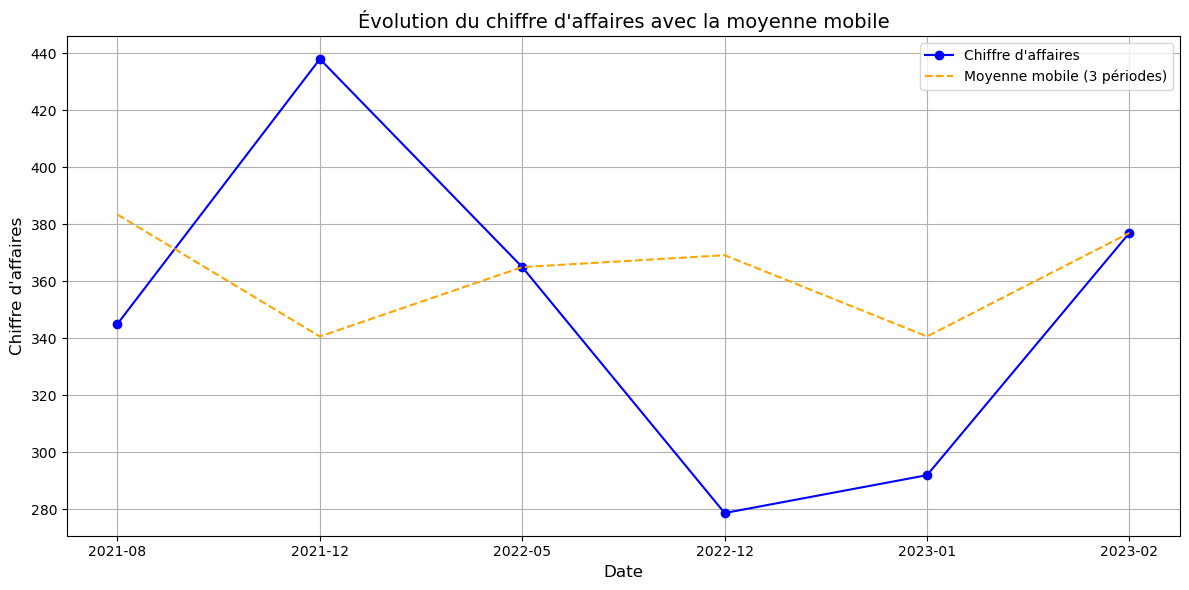

In [726]:
#Evolution graphique  du CA par mois et moyenne mobile sur 3 mois
plt.figure(figsize=(12, 6))
plt.plot(ca_mobile_mois['mois'], ca_mobile_mois['ca'], label='Chiffre d\'affaires', color='blue', marker='o')
plt.plot(ca_mobile_mois['mois'], ca_mobile_mois['ca_moyenne_mobile'], label='Moyenne mobile (3 périodes)', color='orange', linestyle='--')
plt.title("Évolution du chiffre d'affaires avec la moyenne mobile", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [727]:
#Top des chiffres d'affaire mobiles par jour sur 7 jours et la moyenne
ca_mobile_jour = top_ca_mobile.groupby('dates')[['ca_moyenne_mobile', 'ca']].mean().reset_index().head(10)
ca_mobile_jour.sort_values(by='dates', inplace=True)
ca_mobile_jour['ca_moyenne_mobile_j'] = ca_mobile_jour['ca'].rolling(window=2, min_periods=1).mean()
ca_mobile_jour

,dates,ca_moyenne_mobile,ca,ca_moyenne_mobile_j
0,2021-08-28,383.400000,460.08,460.080
1,2021-08-30,383.400000,230.04,345.060
2,2021-12-12,340.643333,437.97,334.005
3,2022-05-25,340.643333,437.97,437.970
4,2022-05-28,389.306667,291.98,364.975
5,2022-12-06,383.400000,460.08,376.030
6,2022-12-08,383.400000,230.04,345.060
7,2022-12-12,340.643333,145.99,188.015
8,2023-01-06,340.643333,291.98,218.985
9,2023-02-07,376.960000,376.96,334.470


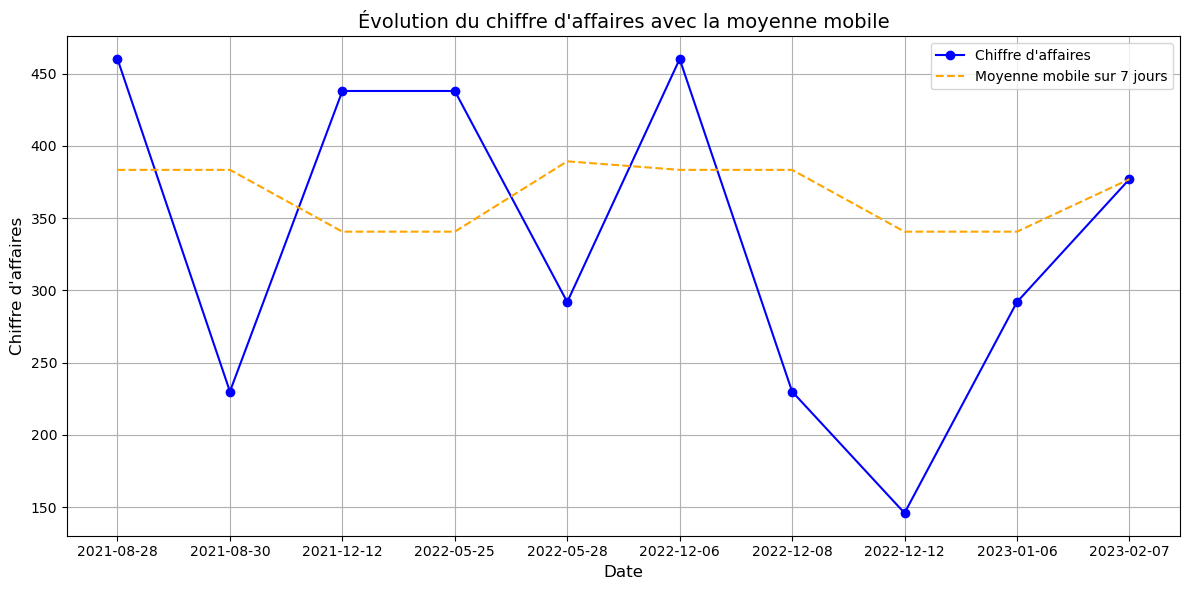

In [728]:
#Evolution graphique du CA par jour et Moyenne mobile sur 7 jours
plt.figure(figsize=(12, 6))
plt.plot(ca_mobile_jour['dates'], ca_mobile_jour['ca'], label='Chiffre d\'affaires', color='blue', marker='o')
plt.plot(ca_mobile_jour['dates'], ca_mobile_jour['ca_moyenne_mobile'], label='Moyenne mobile sur 7 jours', color='orange', linestyle='--')
plt.title("Évolution du chiffre d'affaires avec la moyenne mobile", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [729]:
#Evolution du CA par jour et moyenne mobile sur 30 jours
ca_mobile_30jour = top_ca_mobile.groupby('dates')[['ca_moyenne_mobile', 'ca']].mean().reset_index()
ca_mobile_30jour.sort_values(by='dates', inplace=True)
ca_mobile_30jour['ca_moyenne_mobile_30j'] = ca_mobile_jour['ca'].rolling(window=30, min_periods=1).mean()
ca_mobile_30jour

,dates,ca_moyenne_mobile,ca,ca_moyenne_mobile_30j
0,2021-08-28,383.400000,460.08,460.080000
1,2021-08-30,383.400000,230.04,345.060000
2,2021-12-12,340.643333,437.97,376.030000
3,2022-05-25,340.643333,437.97,391.515000
4,2022-05-28,389.306667,291.98,371.608000
5,2022-12-06,383.400000,460.08,386.353333
6,2022-12-08,383.400000,230.04,364.022857
7,2022-12-12,340.643333,145.99,336.768750
8,2023-01-06,340.643333,291.98,331.792222
9,2023-02-07,376.960000,376.96,336.309000


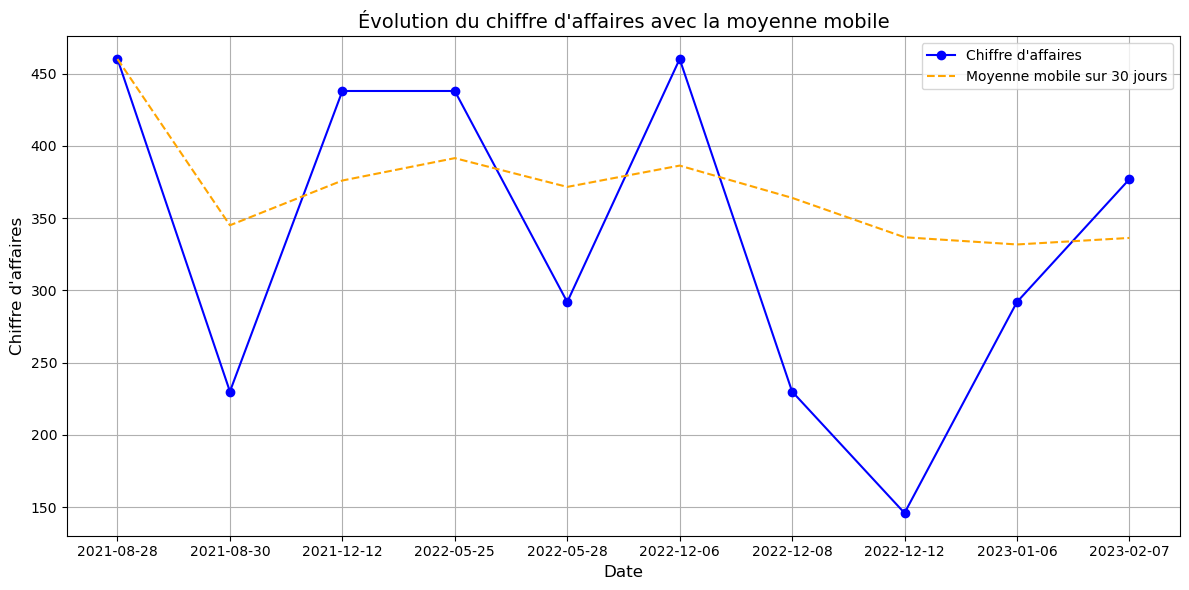

In [893]:
#Evolution graphique  du CA par jour et moyenne mobile sur 30 jours
plt.figure(figsize=(12, 6))
plt.plot(ca_mobile_30jour['dates'], ca_mobile_30jour['ca'], label="Chiffre d'affaires", color='blue', marker='o')
plt.plot(ca_mobile_30jour['dates'], ca_mobile_30jour['ca_moyenne_mobile_30j'], label='Moyenne mobile sur 30 jours', color='orange', linestyle='--')

plt.title("Évolution du chiffre d'affaires avec la moyenne mobile", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [731]:
#Top des chiffres d'affaire mobiles par mois et la moyenne
ca_mois = df_ca.groupby('mois')['ca'].sum().reset_index()
ca_mois.head()

,mois,ca
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40


In [732]:
fig = px.line(
    ca_mois,
    x='mois',
    y='ca',
    # color='annee_mois',
    title='Chiffre d\'affaire par mois',
    labels={'mois': 'Mois', 'ca': 'Chiffre d\'affaire'}
)
fig
fig.update_traces(text=ca_mois['ca'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.3 - Chiffre d’affaires mobile par mois </h3>
</div>

In [734]:
ca_mobile_mois = df_ca.groupby('mois')['ca_moyenne_mobile'].sum().reset_index()
ca_mobile_mois.head()

,mois,ca_moyenne_mobile
0,2021-03,485026.930000
1,2021-04,474972.426667
2,2021-05,493720.790000
3,2021-06,482789.440000
4,2021-07,482384.433333


In [735]:
fig = px.line(
    ca_mobile_mois,
    x='mois',
    y='ca_moyenne_mobile',
    # color='annee_mois',
    title='Chiffre d\'affaire mobile par mois',
    labels={'mois': 'Mois', 'ca_moyenne_mobile': 'Chiffre d\'affaire moyenne mobile'}
)
fig
fig.update_traces(text=ca_mobile_mois['ca_moyenne_mobile'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.4 - Chiffre d’affaires par catégorie </h3>
</div>

In [737]:
#Affichage du chiffre d'affaires par catégorie
ca_categorie = df_ca.groupby('categ')['ca'].sum().reset_index()
ca_categorie.head()

,categ,ca
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


In [738]:
#Representation graphique du CA par categorie
fig = px.bar(
    ca_categorie, 
    x='categ', 
    y='ca',
    title='Chiffre d’affaires par catégorie',
    labels={'categ': 'Catégorie', 'ca': 'Chiffre d\'affaires'}
)
# Ajouter les valeurs sur les barres
fig.update_traces(text=ca_categorie['ca'], textposition='auto')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.5- Nombre de clients par mois </h3>
</div>

In [741]:
df_ca['dates'] = pd.to_datetime(df_ca['dates'])

In [743]:
df_ca['annee_mois'] = df_ca['dates'].dt.to_period('M')

In [744]:
nbre_clients_mois = df_ca.groupby('annee_mois')['nbre_client'].sum().reset_index()

In [747]:
nbre_clients_mois.head()

,annee_mois,nbre_client
0,2021-03,28601
1,2021-04,28443
2,2021-05,28285
3,2021-06,26850
4,2021-07,24738


In [749]:
#Representation graphique du nombre de clients par mois
nbre_clients_mois['annee_mois'] = nbre_clients_mois['annee_mois'].astype(str)
fig = px.line(
    nbre_clients_mois,
    x='annee_mois',
    y='nbre_client',
    # color='annee_mois',
    title='Nombre de clients par mois',
    labels={'annee_mois': 'Mois', 'nbre_client': 'Nombre de clients'}
)
fig
fig.update_traces(text=nbre_clients_mois['nbre_client'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.6 - Nombre de transactions </h3>
</div>

In [751]:
nbre_transact = df_ca.groupby('annee_mois').size().reset_index(name='nbre_transaction')
nbre_transact.head()

,annee_mois,nbre_transaction
0,2021-03,22872
1,2021-04,22862
2,2021-05,23011
3,2021-06,21526
4,2021-07,20143


In [756]:
#Representation graphique du nombre de transactions
nbre_transact['annee_mois'] = nbre_transact['annee_mois'].astype(str)
fig = px.bar(
    nbre_transact,
    x='annee_mois',
    y='nbre_transaction',
    title='Nombre de transactions',
    labels={'annee_mois': 'Mois', 'nbre_transaction': 'Nombre de transactions'}
)
fig.update_traces(text=nbre_transact['nbre_transaction'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.7 - Nombre de produits vendus </h3>
</div>

In [760]:
nbre_produits_vendus = df_ca['quantite'].sum()
print('Le nombre de produits vendus est de :', nbre_produits_vendus)

Le nombre de produits vendus est de : 687534


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.8 - Les tops des ventes </h3>
</div>

In [767]:
df_top_vente =df_merge.groupby(['id_prod']).agg(ca=('price','sum'),count=('session_id','count')).reset_index()
top=df_top_vente.sort_values(by='ca', ascending=False).head(10)
top

,id_prod,ca,count
3096,2_159,94893.50,650
3070,2_135,69334.95,1005
3045,2_112,65407.76,968
3034,2_102,60736.78,1027
3152,2_209,56971.86,814
2619,1_395,56617.47,1953
2591,1_369,56136.60,2340
3043,2_110,53846.25,865
2607,1_383,53834.43,1857
2641,1_414,53522.18,2246


In [777]:
df_top_vente =df_merge.groupby(['id_prod']).agg(ca=('price','sum'),count=('session_id','count')).reset_index()
top=df_top_vente.sort_values(by='count', ascending=False).head(10)
top

,id_prod,ca,count
2591,1_369,56136.60,2340
2644,1_417,47626.31,2269
2641,1_414,53522.18,2246
2733,1_498,51460.74,2202
2653,1_425,36749.37,2163
2629,1_403,36699.60,2040
2640,1_413,36627.64,2036
2639,1_412,33533.10,2014
2632,1_406,49694.43,2003
2633,1_407,31995.99,2001


In [779]:
#Representation graphique des tops des ventes
fig = px.bar(
    top,
    x='id_prod',
    y='ca',
    title='Les tops des ventes',
    labels={'session_id': 'sessions', 'ca': 'Nombre de vente'}
)
fig.update_traces(text=top['ca'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.9 - Les flops des ventes </h3>
</div>

In [786]:
top_flops = df_ca.groupby('id_prod')[['ca']].sum().reset_index()
flops_ventes = top_flops.sort_values(by='ca', ascending=True).head(10)
flops_ventes

,id_prod,ca
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1784,0_541,1.99
665,0_1601,1.99
2079,0_807,1.99
802,0_1728,2.27
549,0_1498,2.48
2179,0_898,2.54
925,0_1840,2.56


In [788]:
# Création du graphique avec Plotly
fig = px.bar(
    flops_ventes,
    x='id_prod',
    y='ca',
    title='Les Tops Flops des Ventes',
    labels={'id_prod': 'Produits', 'quantite': 'Nombre de ventes'},
    text=flops_ventes['ca'],  # Affichage du CA sur les barres
)

# Amélioration de l'affichage
fig.update_traces(textposition='auto')
fig.update_layout(xaxis={'categoryorder':'total ascending'})  # Assure l'ordre croissant des ventes

# Affichage du graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.0 - Tops CA par mois </h3>
</div>

In [792]:
top_5_ca_mois = df_ca.groupby(['annee_mois', 'id_prod'])['ca'].sum().reset_index()
mois_ca = top_5_ca_mois.sort_values(by=['annee_mois', 'ca'], ascending=False)
mois_ca = top_5_ca_mois.groupby('annee_mois').head(5)

C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\1455775464.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='annee_mois', ylabel='ca'>

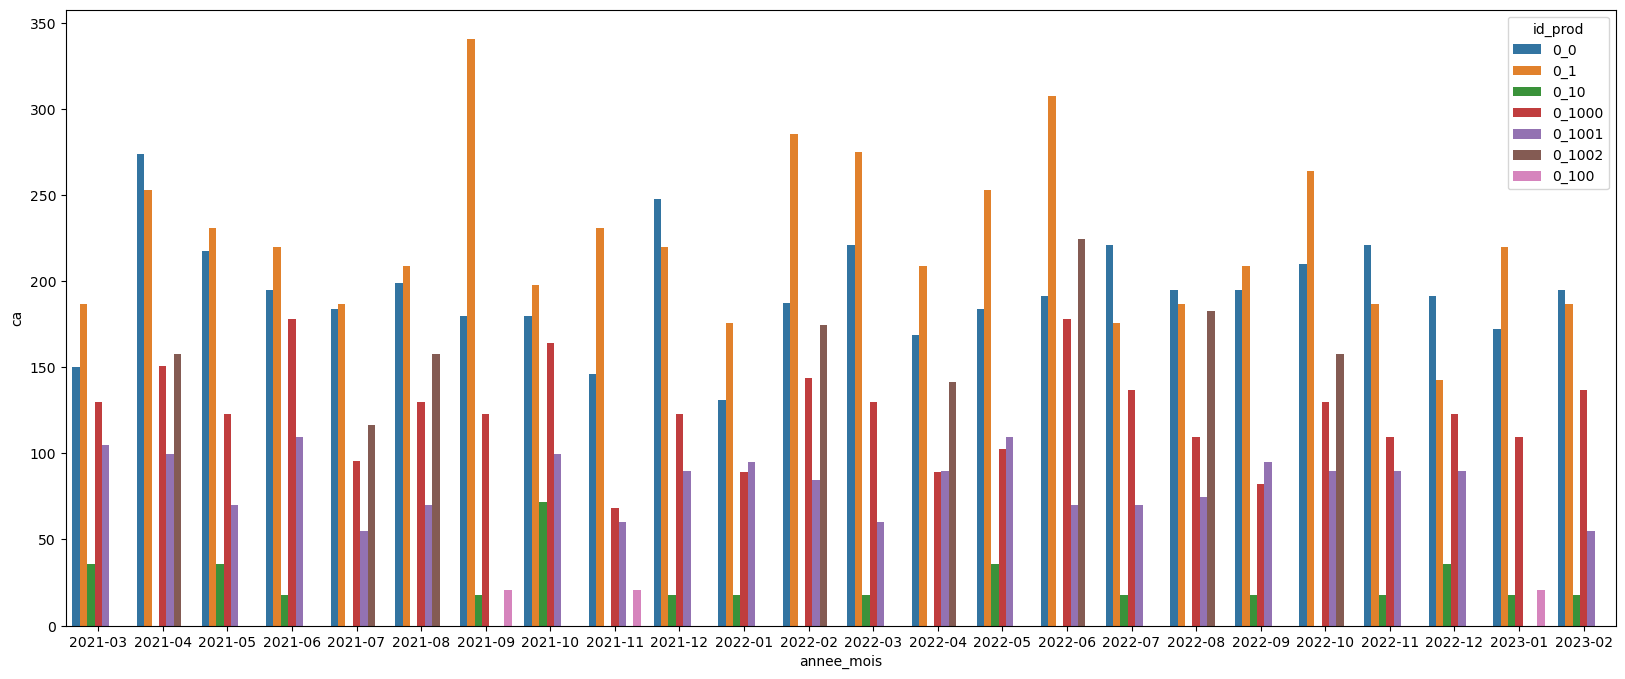

In [793]:
#Representation graphique du top 5 des chiffres d'affaire par mois 
mois_ca['annee_mois'] = mois_ca['annee_mois'].astype(str)

plt.figure(figsize=(20,8))
sns.barplot(mois_ca, x='annee_mois', y='ca', hue='id_prod')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.1 - La répartition des clients par catégorie </h3>
</div>

In [797]:
client_categ = df_ca.groupby('categ')['nbre_client'].sum().reset_index()
client_categ

,categ,nbre_client
0,0,415459
1,1,235592
2,2,36483


In [798]:
#Representation graphique de la répartition des clients par categorie
fig = px.bar(
    client_categ,
    x='categ',
    y='nbre_client',
    title='La répartition des clients par catégorie',
    labels={'categ': 'Categorie', 'nbre_client': 'Nombre de client'}
)
fig.update_traces(text=client_categ['nbre_client'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.2 - La répartition des CA par catégorie </h3>
</div>

In [802]:
ca_categ = df_ca.groupby('categ')['ca'].sum().reset_index()
ca_categ

,categ,ca
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


In [804]:
#Representation graphique de la répartition des chiffres d'affaire par categorie
fig = px.bar(
    ca_categ,
    x='categ',
    y='ca',
    title='La répartition des Ca par catégorie',
    labels={'categ': 'Categorie', 'ca': 'Chiffres daffaire'}
)
fig.update_traces(text=ca_categ['ca'], textposition='auto')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.3 - Répartition du chiffre d'affaire pour les clients B2B </h3>
</div>

In [807]:
#Affichage des clients par prix
ca_clt = df_merge.groupby('client_id')['price'].sum().reset_index()
ca_clt.head()

,client_id,price
0,c_1,629.02
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2291.88
4,c_1001,1823.85


<Axes: xlabel='price'>

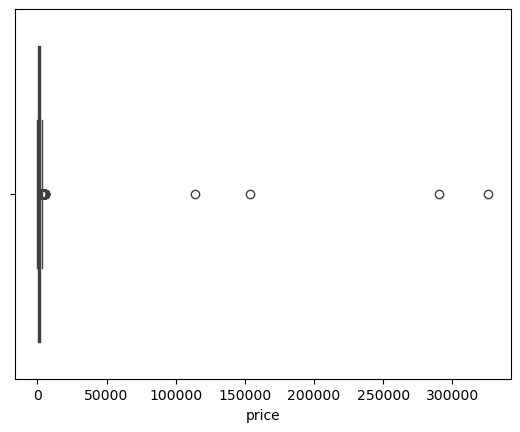

In [809]:
# Boxplot
sns.boxplot(x=ca_clt['price'])

In [810]:
#Définition des outliers 
def outliers(data):
    # Calculer les quartiles et l'IQR
    Q1 = np.quantile (data['price'], 0.25)
    Q3 = np.quantile (data['price'],0.75)
    IQR = Q3 - Q1
    # Définir les seuils pour les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les valeurs de prix qui sont des outliers
    outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)].sort_values('price', ascending=False).head(4)
    
    # Afficher les seuils et les outliers
    print("Seuil inférieur est de : {:.2f} ".format(lower_bound))
    print("Seuil supérieur est de : {:.2f} ".format(upper_bound))
    print(f"Le nombre de Outliers est de : {len(outliers)}")
    print("\nOutliers :")
    print(outliers)
    return outliers

In [812]:
clt_b2b = outliers(ca_clt)

Seuil inférieur est de : -1289.75 
Seuil supérieur est de : 3650.20 
Le nombre de Outliers est de : 4

Outliers :
     client_id      price
677     c_1609  326039.89
4388    c_4958  290227.03
6337    c_6714  153918.60
2724    c_3454  114110.57


In [816]:
#Repartition graphique du chiffre d'affaire pour les clients B2B
fig = px.bar(
    clt_b2b,
    x='client_id',
    y='price',
    title='Repartition du chiffre d\'affaire pour les clients B2B',
    labels={'client_id': 'Clients B2B', 'price': 'Chiffre d\'affaire'}
)
fig.update_traces(text=clt_b2b['price'], textposition='auto')

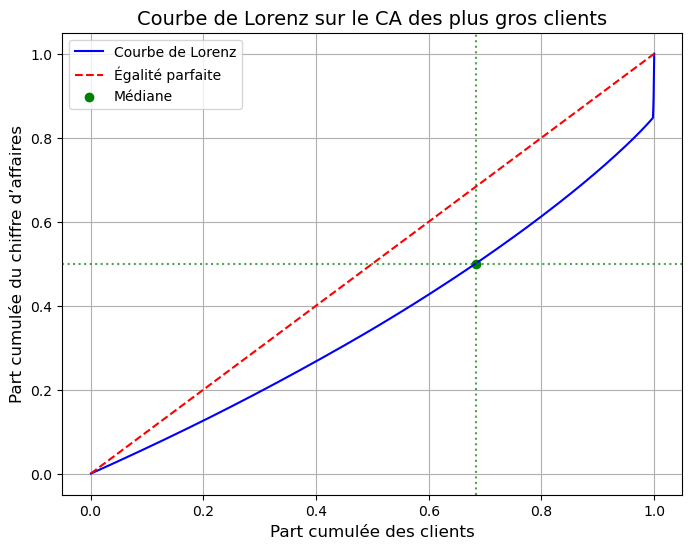

Coefficient de Gini : 0.2620


In [819]:
#Representation graphique des plus gros clients avec la courbe de lorenz
ca_clts = ca_clt.sort_values(by='price', ascending=False)
top_percent = 0.2 
top_clients = ca_clts.head(int(len(ca_clts) * top_percent))

# Tri des clients par chiffre d'affaires croissant pour la courbe de Lorenz
top_clients = top_clients.sort_values(by='price', ascending=True)

# Calcul des parts cumulées du CA et des clients
top_clients['ca_cum'] = top_clients['price'].cumsum() / top_clients['price'].sum()
top_clients['clients_cum'] = np.arange(1, len(top_clients) + 1) / len(top_clients)

# Calcul du coefficient de Gini
gini = 1 - 2 * np.trapz(top_clients['ca_cum'], top_clients['clients_cum'])

# Vérification et calcul de la médiane de la courbe de Lorenz
median_x, median_y = None, None
if not top_clients.empty:
    median_index = np.searchsorted(top_clients['ca_cum'].values, 0.5)
    if median_index < len(top_clients):
        median_x = top_clients['clients_cum'].iloc[median_index]
        median_y = top_clients['ca_cum'].iloc[median_index]

# Tracé de la courbe de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(top_clients['clients_cum'], top_clients['ca_cum'], label='Courbe de Lorenz', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Égalité parfaite')

# Ajout de la médiane si elle est définie
if median_x is not None and median_y is not None:
    plt.scatter(median_x, median_y, color='green', marker='o', label='Médiane')
    plt.axvline(median_x, color='green', linestyle='dotted', alpha=0.7)
    plt.axhline(median_y, color='green', linestyle='dotted', alpha=0.7)

# Personnalisation du graphique
plt.title('Courbe de Lorenz sur le CA des plus gros clients', fontsize=14)
plt.xlabel('Part cumulée des clients', fontsize=12)
plt.ylabel('Part cumulée du chiffre d’affaires', fontsize=12)
plt.legend()
plt.grid()
plt.show()

print(f"Coefficient de Gini : {gini:.4f}")

C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\1749185848.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\1749185848.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



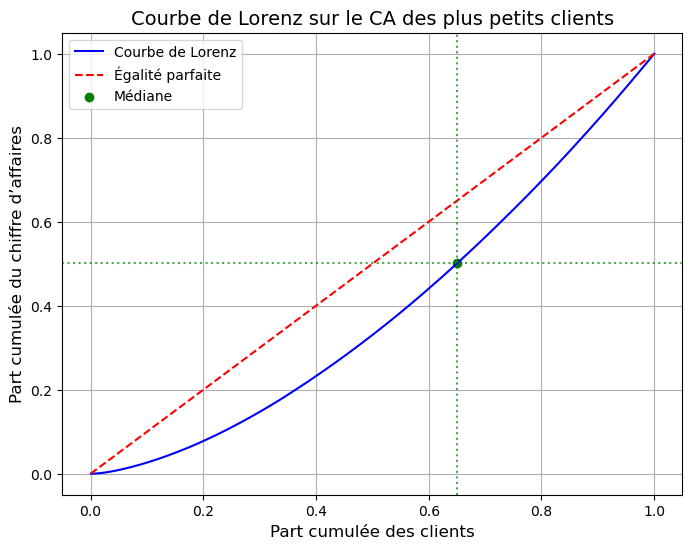

Coefficient de Gini : 0.2311


In [821]:
#Representation graphique de la courbe de lorenz des clients les plus faibles
# Trier les clients par chiffre d'affaires croissant (les plus faibles en premier)
ca_clts = ca_clt.sort_values(by='price', ascending=True)

# Sélection des clients les plus faibles (ex: les 20% du bas)
top_percent = 0.2  # Ajustez ce seuil si nécessaire
low_clients = ca_clts.head(int(len(ca_clts) * top_percent))

# Calcul des parts cumulées du CA et des clients
low_clients['ca_cum'] = low_clients['price'].cumsum() / low_clients['price'].sum()
low_clients['clients_cum'] = np.arange(1, len(low_clients) + 1) / len(low_clients)

# Calcul du coefficient de Gini
gini = 1 - 2 * np.trapz(low_clients['ca_cum'], low_clients['clients_cum'])

# Vérification et calcul de la médiane de la courbe de Lorenz
median_x, median_y = None, None
if not low_clients.empty:
    median_index = np.searchsorted(low_clients['ca_cum'].values, 0.5)
    if median_index < len(low_clients):
        median_x = low_clients['clients_cum'].iloc[median_index]
        median_y = low_clients['ca_cum'].iloc[median_index]

# Tracé de la courbe de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(low_clients['clients_cum'], low_clients['ca_cum'], label='Courbe de Lorenz', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Égalité parfaite')

# Ajout de la médiane si elle est définie
if median_x is not None and median_y is not None:
    plt.scatter(median_x, median_y, color='green', marker='o', label='Médiane')
    plt.axvline(median_x, color='green', linestyle='dotted', alpha=0.7)
    plt.axhline(median_y, color='green', linestyle='dotted', alpha=0.7)

# Personnalisation du graphique
plt.title('Courbe de Lorenz sur le CA des plus petits clients', fontsize=14)
plt.xlabel('Part cumulée des clients', fontsize=12)
plt.ylabel('Part cumulée du chiffre d’affaires', fontsize=12)
plt.legend()
plt.grid()
plt.show()

print(f"Coefficient de Gini : {gini:.4f}")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.0 - Vérification et analyse de la corrélation entre différents variables </h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.1 - Test de Shapiro pour les variables numériques continues </h3>
</div>

In [827]:
variables_num = list(df_ca.select_dtypes(include=['float64', 'int64']).columns)
variables_num.remove('categ')

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 544382.



Variable : quantite
  - Statistique W : 0.5017
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


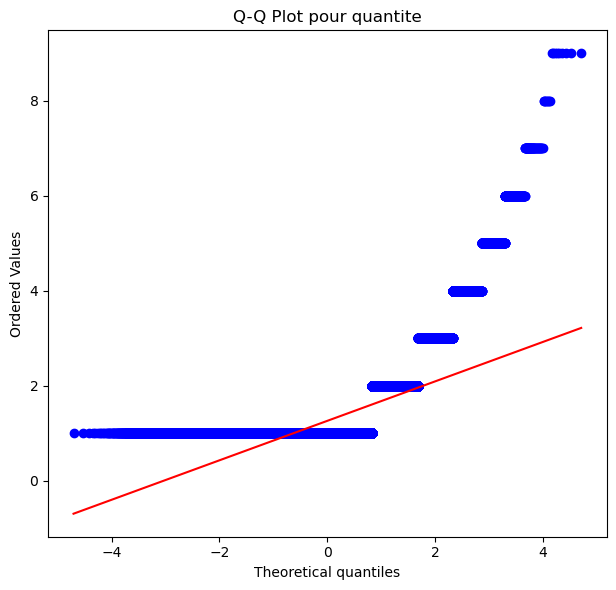

Variable : ca
  - Statistique W : 0.6042
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


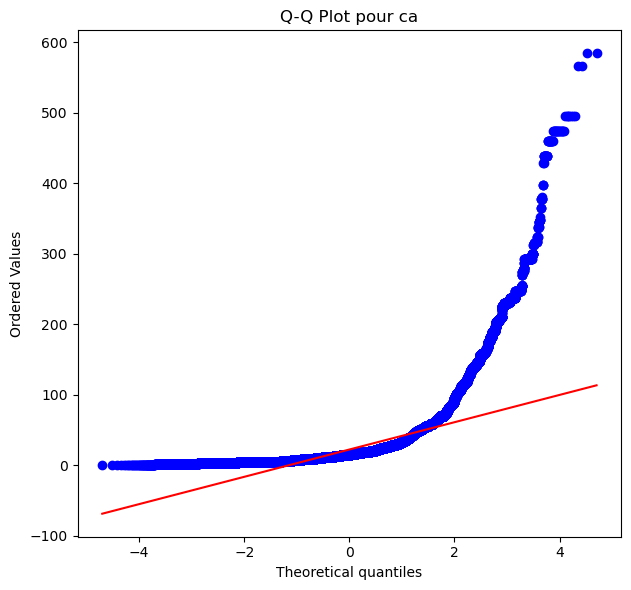

Variable : age_moyenne
  - Statistique W : 0.9762
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


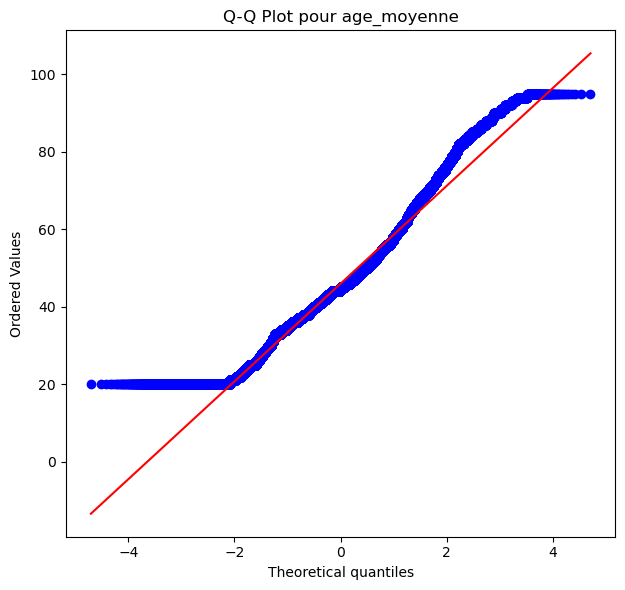

Variable : nbre_client
  - Statistique W : 0.5017
  - p-value : 0.0000
  - Conclusion : Les données ne suivent pas une distribution normale.


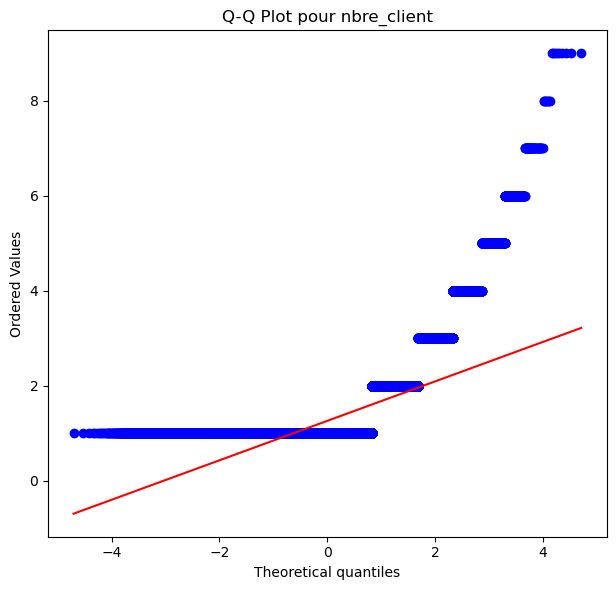

Variable : ca_moyenne_mobile
  - Statistique W : nan
  - p-value : nan
  - Conclusion : Les données ne suivent pas une distribution normale.


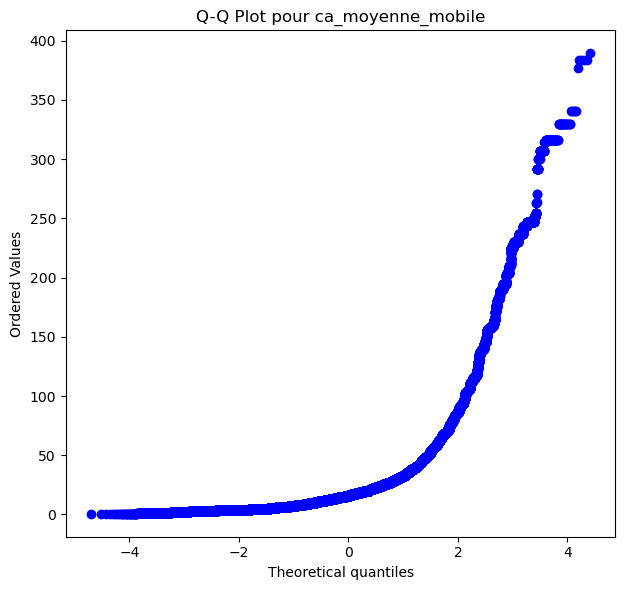

In [829]:
variables_num_resul = {}
for col in variables_num:
    # Test de Shapiro-Wilk
    stat, p = shapiro(df_ca[col])
    variables_num_resul[col] = {
        'Statistique W': stat,
        'p-value': p,
        'Normalité': 'Oui' if p > 0.005 else 'Non'
    }
    print(f"Variable : {col}")
    print(f"  - Statistique W : {stat:.4f}")
    print(f"  - p-value : {p:.4f}")
    print(f"  - Conclusion : {'Les données suivent une distribution normale.' if p > 0.005 else 'Les données ne suivent pas une distribution normale.'}")
    plt.figure(figsize=(12, 6))
# Boxplot
    # plt.subplot(1, 2, 1)
    # sns.boxplot(x=df_ca[col])
    # plt.title(f"Boxplot pour {col}")
    
# Q-Q Plot
    plt.subplot(1, 2, 1)
    probplot(df_ca[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot pour {col}")
    
    # Ajuster l'agencement et afficher
    plt.tight_layout()
    plt.show()

In [830]:
variables_num_resul_df = pd.DataFrame(variables_num_resul).T
variables_num_resul_df

,Statistique W,p-value,Normalité
quantite,0.501661,0.0,Non
ca,0.604154,0.0,Non
age_moyenne,0.976164,0.0,Non
nbre_client,0.501661,0.0,Non
ca_moyenne_mobile,NaN,NaN,Non


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.1.2 - Le lien entre la catégoerie et le nombre de ventes </h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.1.2.1 - Test de Anova </h3>
</div>

In [901]:
groups = [df_ca[df_ca['categ'] == group]['ca'] for group in df_ca['categ'].unique()]
stat, p = levene(*groups)
print(f"Test de Levene : p-value = {p:.4f} ({'Homogènes' if p > 0.05 else 'Non homogènes'})")

stat, p = f_oneway(*groups)

print(f"Test ANOVA :")
print(f"  - Statistique F = {stat:.4f}")
print(f"  - p-value = {p:.4f}")
if p <= 0.05:
    print("Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes des groupes sont significativement différentes.")
else:
    print("Conclusion : Nous ne rejetons pas l'hypothèse nulle. Les moyennes des groupes ne sont pas significativement différentes.")


Test de Levene : p-value = 0.0000 (Non homogènes)
Test ANOVA :
  - Statistique F = 305870.1440
  - p-value = 0.0000
Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes des groupes sont significativement différentes.


C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\1957038461.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




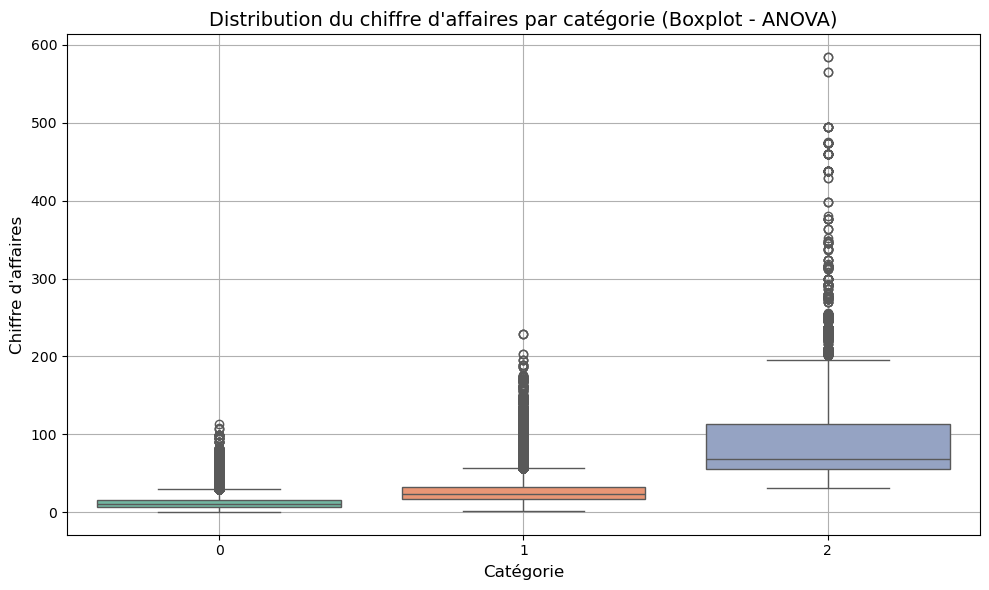

In [903]:
#Representation graphique du test anova

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ca, x='categ', y='ca', palette='Set2')

plt.title("Distribution du chiffre d'affaires par catégorie (Boxplot - ANOVA)", fontsize=14)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.2 - Le lien entre le genre d’un client et les catégories des livres achetés </h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.2.1 - Création d'une table de contingence -- variables « genre» et « catégorie » </h3>
</div>

In [833]:
x = 'categ'
y = 'sex'
cont = df_ca[[x, y]].pivot_table(index=x, columns=y, aggfunc=len, margins=True, margins_name='Total')
cont
conclusion = (
    "À travers l'analyse des valeurs de la table de contingence, "
    "nous observons que chaque catégorie de produit est vendue aux hommes. "
    "Cela suggère qu'il existe une différence de comportement d'achat entre les genres."
)

print(conclusion)

À travers l'analyse des valeurs de la table de contingence, nous observons que chaque catégorie de produit est vendue aux hommes. Cela suggère qu'il existe une différence de comportement d'achat entre les genres.


In [877]:
# Table de contingence simple (sans marges, pour le test khi²)
cont_table = pd.crosstab(df_ca[x], df_ca[y])

# Affichage de la table de contingence
print("Table de contingence :")
print(cont_table)

# Test du khi²
chi2, p_value, dof, expected = chi2_contingency(cont_table)

print("\nRésultat du test du khi² :")
print(f"Statistique de khi² : {chi2:.2f}")
print(f"Degrés de liberté : {dof}")
print(f"Valeur p : {p_value:.4f}")

# Table avec marges, pour lecture humaine
cont_table_margins = pd.crosstab(df_ca[x], df_ca[y], margins=True, margins_name='Total')

Table de contingence :
sex         f       m
categ                
0      170386  172566
1       86195   84410
2       14757   16068

Résultat du test du khi² :
Statistique de khi² : 82.95
Degrés de liberté : 2
Valeur p : 0.0000


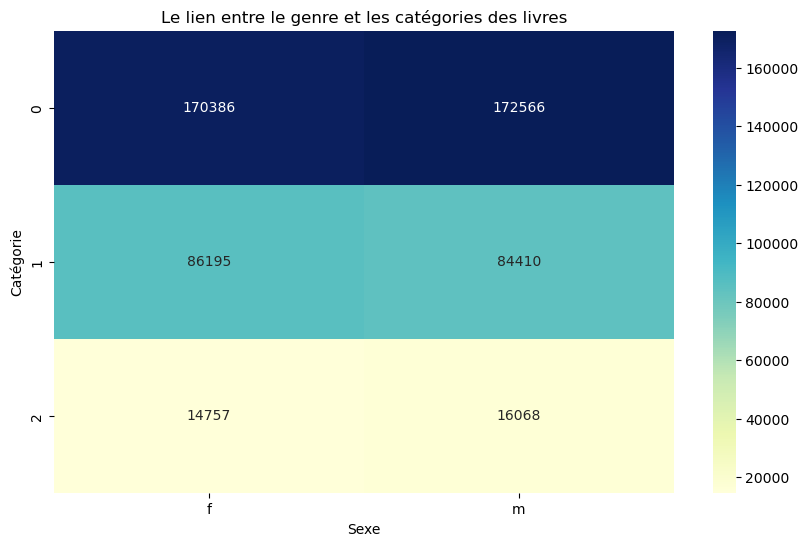

In [881]:
# Création du graphique
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, fmt="d", cmap="YlGnBu")

# Ajout des titres et labels
plt.title("Le lien entre le genre et les catégories des livres")
plt.xlabel("Sexe")  # Correction : c'est 'sex' en colonne
plt.ylabel("Catégorie")  # Correction : c'est 'categ' en index

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.3 - Le lien entre l’âge des clients et le montant total des achats </h3>
</div>

In [857]:
df_cl_normal = df_merge[~df_merge['client_id'].isin(clt_b2b)]
df_cl_normal.head()

,id_prod,price,categ,date,session_id,client_id,mois,annee,dates,sex,birth,age
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,2021-03,2021,2021-03-01,m,1972,52
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,2021-03,2021,2021-03-01,f,1967,57
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03,2021,2021-03-01,f,1936,88
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,2021-03,2021,2021-03-02,f,1989,35
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,2021-03,2021,2021-03-02,m,1981,43


In [938]:
age_ca = df_cl_normal.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum').reset_index()
groups = [df_ca[df_ca['categ'] == group]['ca'] for group in df_ca['categ'].unique()]
stat, p = levene(*groups)
print(f"Test de Levene : p-value = {p:.4f} ({'Homogènes' if p > 0.05 else 'Non homogènes'})")

# Test ANOVA
stat_anova, p_anova = f_oneway(*groups)
print("Test ANOVA :")
print(f"  - Statistique F = {stat_anova:.4f}")
print(f"  - p-value = {p_anova:.4f}")

if p_anova <= 0.05:
    print("Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes de prix selon l'âge sont significativement différentes.")
else:
    print("Conclusion : Nous ne rejetons pas l'hypothèse nulle. Les moyennes de prix selon l'âge ne sont pas significativement différentes.")

Test de Levene : p-value = 0.0000 (Non homogènes)
Test ANOVA :
  - Statistique F = 305870.1440
  - p-value = 0.0000
Conclusion : Nous rejetons l'hypothèse nulle. Les moyennes de prix selon l'âge sont significativement différentes.


C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\3586432246.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




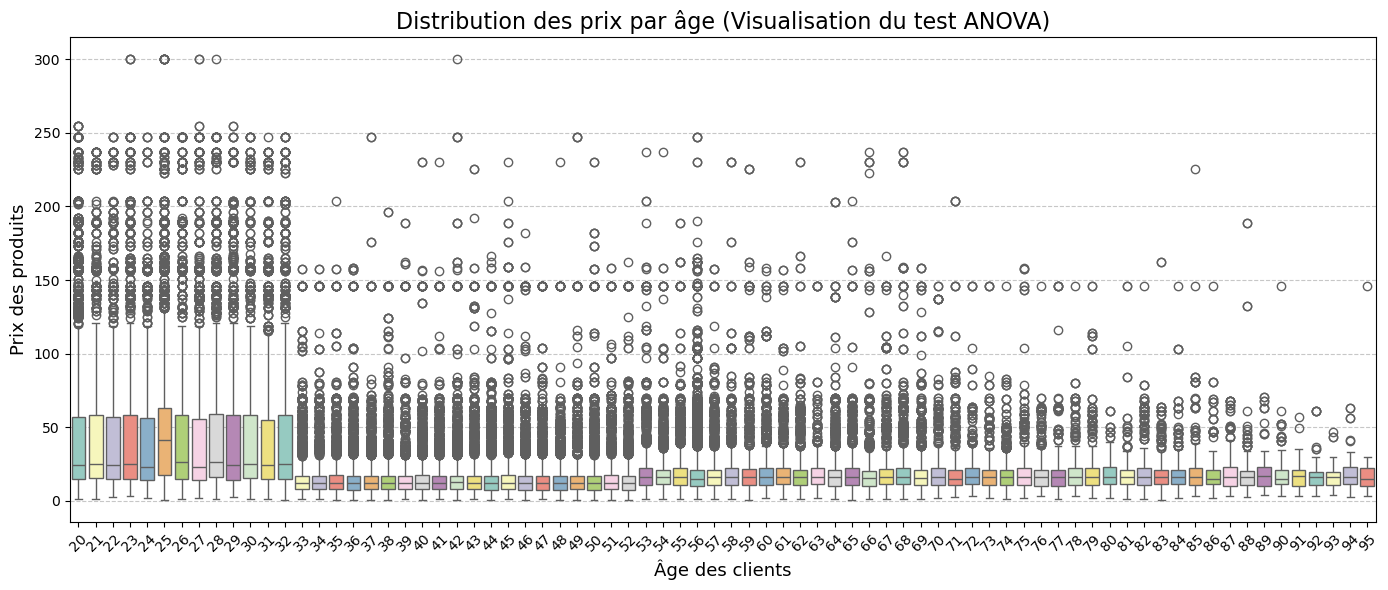

In [913]:

# S'assurer que les âges sont triés (utile pour affichage lisible)
df_cl_normal_sorted = df_cl_normal.sort_values("age")

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_cl_normal_sorted,
    x="age",
    y="price",
    palette="Set3"
)

plt.title("Distribution des prix par âge (Visualisation du test ANOVA)", fontsize=16)
plt.xlabel("Âge des clients", fontsize=13)
plt.ylabel("Prix des produits", fontsize=13)
plt.xticks(rotation=45)  # Rotation utile si beaucoup de valeurs d'âge
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

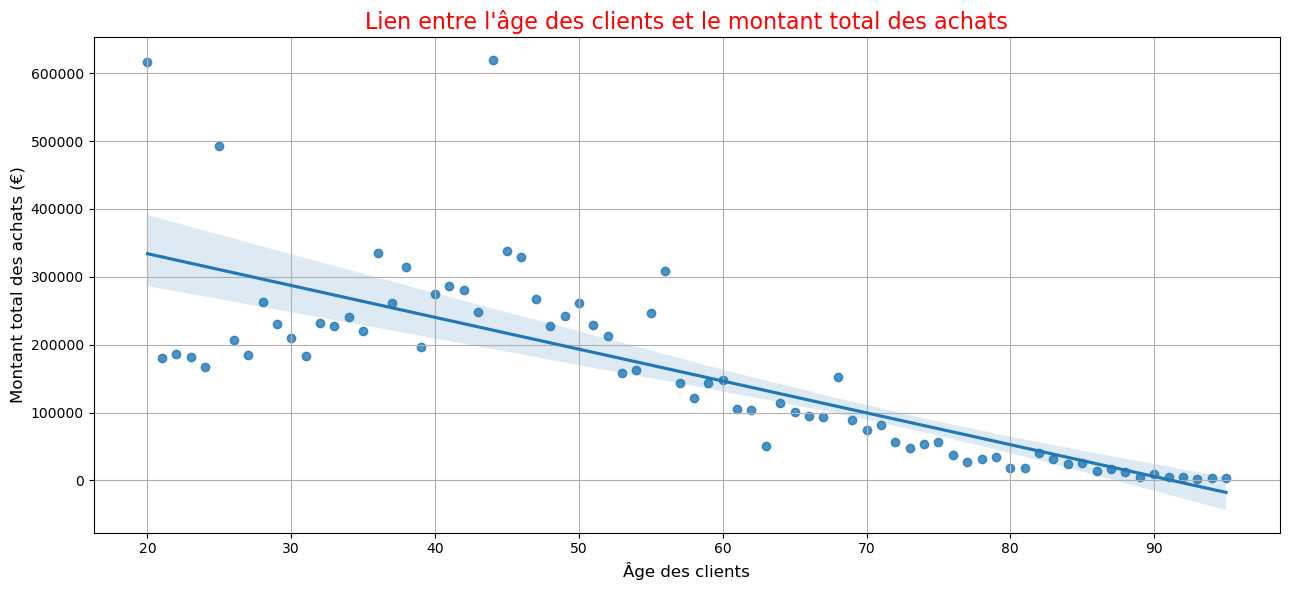

In [921]:
plt.figure(figsize=(13, 6))

# Tracé du graphique avec droite de régression
sns.regplot(x='age', y='sum', data=age_ca)

# Ajout des labels et du titre
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Montant total des achats (€)", fontsize=12)
plt.title("Lien entre l'âge des clients et le montant total des achats", fontsize=16, color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Visualisation sous forme de nuage de points 
plt.figure(figsize=(13, 6))  # Correction de figsize
# Tracé du graphique avec la régression
sns.regplot(x='age', y='count', data=age_ca)

# Ajout des labels et du titre
plt.ylabel('Fréquence d\'achat')
plt.xlabel('Âge des clients')  # Ajout de l'accent sur "Âge"
plt.title("Fréquence d'achat par âge des clients", fontsize=16, color='red')

# Affichage du graphique
plt.show()

In [933]:
#Test de corrélation(Test de pearson)
# Covariance entre âge et somme du CA
cov = np.cov(age_ca['age'], age_ca['sum'], ddof=0)[1, 0]
print(f"La covariance est de : {cov:.4f}")

# Test de corrélation de Pearson
corr, p_value = stats.pearsonr(age_ca['age'], age_ca['sum'])
print(f"Le coefficient de corrélation linéaire de Pearson est : {corr:.4f}")
print(f"La p-value associée est : {p_value:.4f}")

# Interprétation
if p_value <= 0.05:
    print("Conclusion : corrélation significative entre l'âge et le montant total des achats.")
else:
    print("Conclusion : pas de corrélation significative entre l'âge et le montant total des achats.")

La covariance est de : -2256948.6382
Le coefficient de corrélation linéaire de Pearson est : -0.7796
La p-value associée est : 0.0000
Conclusion : corrélation significative entre l'âge et le montant total des achats.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.4 - Lien entre l'age des clients et la fréquence d'achat </h3>
</div>

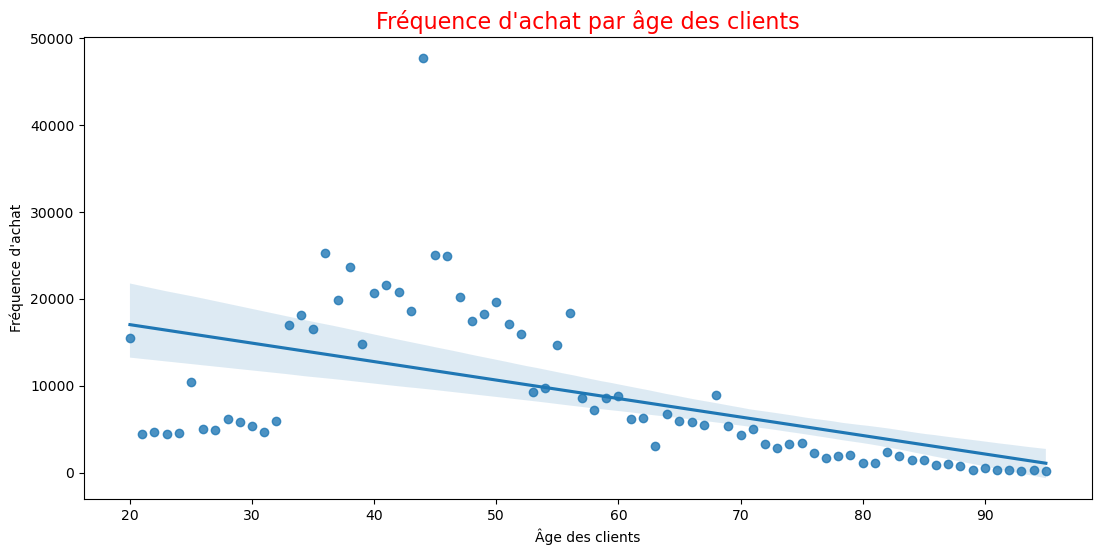

In [865]:
#Visualisation sous forme de nuage de points 

plt.figure(figsize=(13, 6))  # Correction de figsize

# Tracé du graphique avec la régression
sns.regplot(x='age', y='count', data=age_ca)

# Ajout des labels et du titre
plt.ylabel('Fréquence d\'achat')
plt.xlabel('Âge des clients')  # Ajout de l'accent sur "Âge"
plt.title("Fréquence d'achat par âge des clients", fontsize=16, color='red')

# Affichage du graphique
plt.show()

In [935]:
#Test de corrélation (test de pearson)
print('La covariance est de :',np.cov(age_ca['age'],age_ca['count'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de :', stats.pearsonr(age_ca['age'],age_ca['count'])[0])
# Covariance
cov = np.cov(age_ca['age'], age_ca['count'], ddof=0)[1, 0]
print(f"La covariance est de : {cov:.4f}")

# Test de Pearson
corr, p_value = stats.pearsonr(age_ca['age'], age_ca['count'])
print(f"Le coefficient de corrélation linéaire est de : {corr:.4f}")
print(f"La p-value du test de Pearson est : {p_value:.4f}")

# Interprétation
if p_value <= 0.05:
    print("Conclusion : corrélation significative entre l'âge et la fréquence des achats.")
else:
    print("Conclusion : pas de corrélation significative entre l'âge et  la fréquence des achats.")

La covariance est de : -102382.77631578947
Le coefficient de corrélation linéaire est de : -0.5366415853752999
La covariance est de : -102382.7763
Le coefficient de corrélation linéaire est de : -0.5366
La p-value du test de Pearson est : 0.0000
Conclusion : corrélation significative entre l'âge et la fréquence des achats.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.5 - Le lien entre l'âge des clients et la taille du panier moyen </h3>
</div>

In [929]:
#Calcul de la taille du panier moyen
age_ca['panier_moyen']= age_ca['sum']/age_ca['count']
age_ca.head()
# Vérification facultative : s'assurer qu'il n'y a pas de valeurs manquantes
age_panier_df = age_ca[['age', 'panier_moyen']].dropna()

# ✅ Covariance entre l'âge et le panier moyen
cov = np.cov(age_panier_df['age'], age_panier_df['panier_moyen'], ddof=0)[1, 0]
print(f"📊 Covariance entre l'âge et le panier moyen : {cov:.4f}")

# ✅ Test de corrélation de Pearson
corr, p_value = stats.pearsonr(age_panier_df['age'], age_panier_df['panier_moyen'])
print(f"🔗 Coefficient de corrélation de Pearson : {corr:.4f}")
print(f"📈 p-value associée : {p_value:.4f}")

# ✅ Interprétation du résultat
if p_value <= 0.05:
    print("✅ Conclusion : corrélation significative entre l'âge et le panier moyen.")
else:
    print("❌ Conclusion : pas de corrélation significative entre l'âge et le panier moyen.")

📊 Covariance entre l'âge et le panier moyen : -113.1886
🔗 Coefficient de corrélation de Pearson : -0.5453
📈 p-value associée : 0.0000
✅ Conclusion : corrélation significative entre l'âge et le panier moyen.


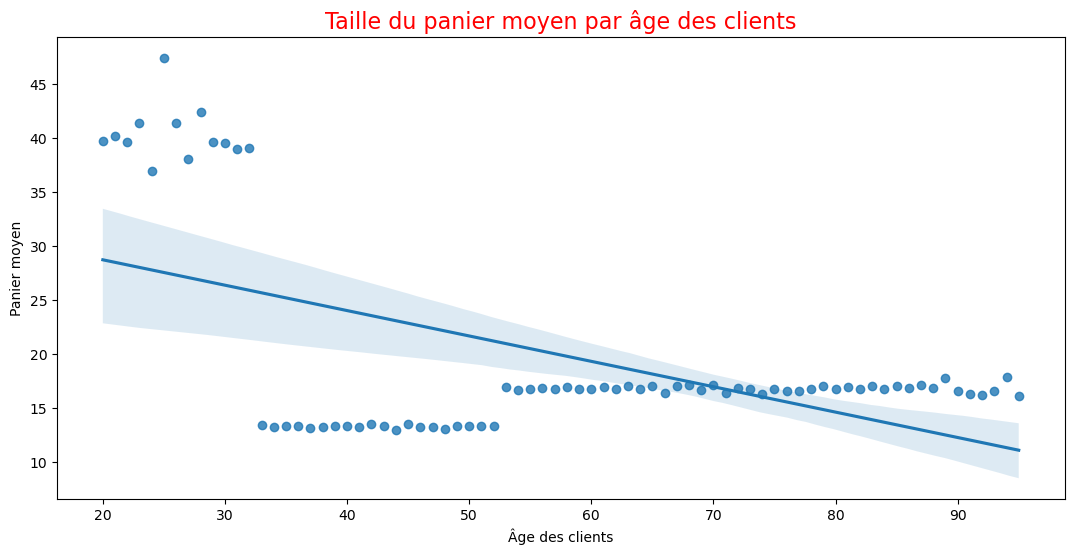

In [871]:
#Visualisation sous forme de nuage de points 

plt.figure(figsize=(13, 6))  # Correction de figsize

# Tracé du graphique avec la régression
sns.regplot(x='age', y='panier_moyen', data=age_ca)

# Ajout des labels et du titre
plt.ylabel('Panier moyen')
plt.xlabel('Âge des clients')  # Ajout de l'accent sur "Âge"
plt.title("Taille du panier moyen par âge des clients", fontsize=16, color='red')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.6 - Le lien entre l’âge des clients et la catégorie des livres achetés </h3>
</div>

C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_21460\1135185994.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




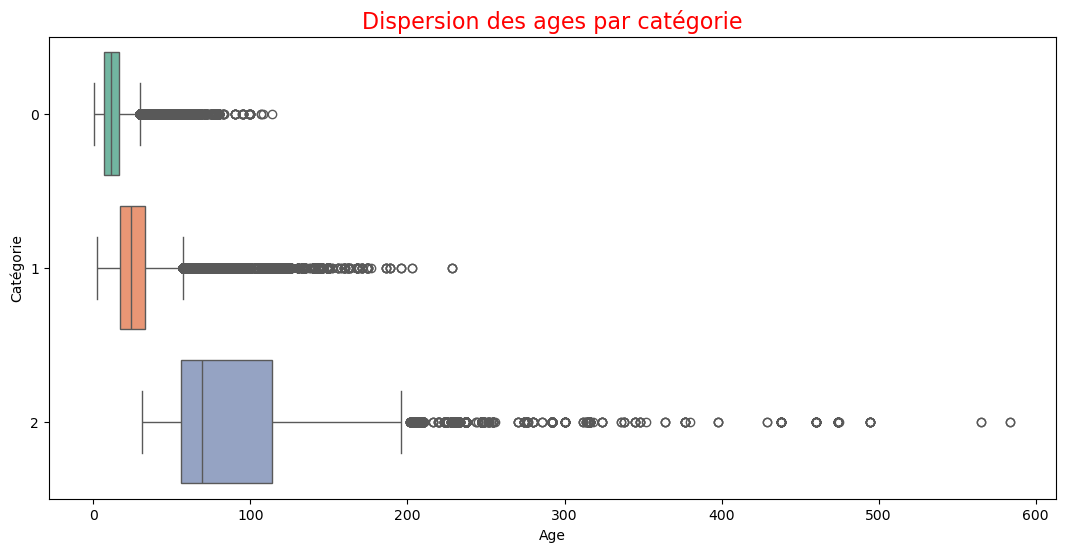

In [416]:
plt.figure(figsize=(13, 6))  # Taille correcte de la figure

# Tracé du boxplot
sns.boxplot(x='ca', y='categ', data=df_ca, orient='h', palette='Set2')  # Correction de l'orientation

# Ajout des labels et du titre
plt.ylabel('Catégorie')
plt.xlabel('Age')  # Correction de l'axe X
plt.title("Dispersion des ages par catégorie", fontsize=16, color='red')

# Affichage du graphique
plt.show()

In [940]:
#Rapport de corrélation n2(eta carré )
#n2=0 cela signifie que les moyennes par classes sont toutes égales.Il n'y a donc pas à priori de relation entre les 2 variables
#n2=1 cela signifie que les moyennes par classes sont très différentes,chacune des classes étant constituée de valeurs identiques:Il existe une relation entre les deux variables
def eta_squared(x, y):
    moyenne_y = y.mean()
    classes = []
    
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe), 'moyenne_classe': yi_classe.mean()})
    
    SCT = sum([(yj - moyenne_y) ** 2 for yj in y])
    SCE = sum([c['ni'] * (c['moyenne_classe'] - moyenne_y) ** 2 for c in classes])

    return SCE / SCT if SCT != 0 else None

# ✅ Regrouper les données par groupe pour ANOVA
groups = [df_merge[df_merge['categ'] == g]['age'] for g in df_merge['categ'].unique()]

# ✅ Calcul de la statistique F et de la p-value
stat, p_value = f_oneway(*groups)

# ✅ Calcul de l’eta squared
eta_s = eta_squared(df_merge['categ'], df_merge['age'])

# ✅ Affichage des résultats
print(f"📊 Eta squared (η²) : {eta_s:.4f}")
print(f"📈 p-value ANOVA : {p_value:.4f}")

# ✅ Interprétation
if p_value <= 0.05:
    print("✅ Conclusion : différence significative entre les groupes (categorie influence l'âge).")
else:
    print("❌ Conclusion : pas de différence significative entre les groupes.")

# Interprétation de η²
if eta_s is not None:
    if eta_s < 0.01:
        print("Effet très faible")
    elif eta_s < 0.06:
        print("Effet faible")
    elif eta_s < 0.14:
        print("Effet modéré")
    else:
        print("Effet fort")
else:
    print("η² non calculable (SCT = 0)")

📊 Eta squared (η²) : 0.1160
📈 p-value ANOVA : 0.0000
✅ Conclusion : différence significative entre les groupes (categorie influence l'âge).
Effet modéré
